Name: Sudhina D

Batch: R3

Date: 22-02-2023

Experiment Name:GAN - MNIST data generation 


## MNIST Database:
Making Classifiers on the MNIST Database is fun, and seeing your model recognize digits as well as you is quite cool. But even cooler is when your model can write! In this notebook, I will be making 2 different GANs: FCGAN (Fully Connected GAN), as well as a DCGAN (Deep convolution GAN).

## Generative adversial networks
GAN are a framework for estimating generative models. Two models are trained simultaneously by an adversarial process: a Generator, which is responsible for generating data, and a Discriminator, which is responsible for estimating the probability that an image was drawn from the training data (real), or was produced by the Generator (fake). During training, the Generator becomes progressively better at generating images, until the Discriminator is no longer able to distinguish real images from fake.



## GANs, Autoencoders and VAEs

It may be useful to compare generative adversarial networks to other neural networks, such as autoencoders and variational autoencoders.

Autoencoders: encode input data as vectors. They create a hidden, or compressed, representation of the raw data. They are useful in dimensionality reduction; that is, the vector serving as a hidden representation compresses the raw data into a smaller number of salient dimensions. Autoencoders can be paired with a so-called decoder, which allows you to reconstruct input data based on its hidden representation, much as you would with a restricted Boltzmann machine.

Variational autoencoders: are generative algorithm that add an additional constraint to encoding the input data, namely that the hidden representations are normalized. Variational autoencoders are capable of both compressing data like an autoencoder and synthesizing data like a GAN. However, while GANs generate data in fine, granular detail, images generated by VAEs tend to be more blurred.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


Import Library

In [ ]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST



Read Dataset

In [ ]:
mnist = MNIST(root='data', 
              train=True, 
              download=True,
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))


In [ ]:
len(mnist)

60000

In [ ]:
img, label = mnist[0]
print(label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


(tensor(-1.), tensor(1.))

In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
def denorm(x):
  out = (x + 1) / 2
  return out.clamp(0, 1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def show_img(img, label):
    print('Label: ', label)
    plt.imshow(img.permute(1,2,0), cmap = 'gray')

Label:  5


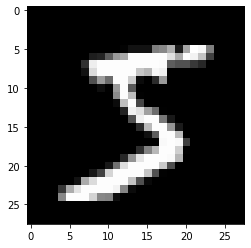

In [ ]:
show_img(*mnist[0])

In [ ]:
img_norm = denorm(img)

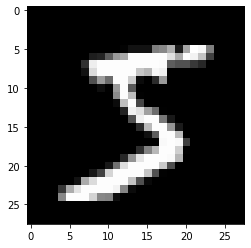

In [ ]:
plt.imshow(img_norm[0], cmap='gray')

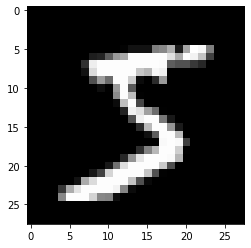

In [ ]:
plt.imshow(img.permute(1,2,0), cmap = 'gray')

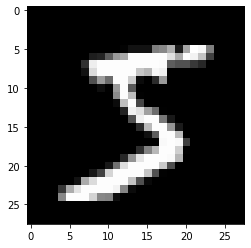

In [ ]:
plt.imshow(img_norm.permute(1,2,0), cmap = 'gray')

In [ ]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(mnist, batch_size, shuffle=True)

first batch
torch.Size([100, 1, 28, 28])
tensor([7, 3, 2, 9, 5, 0, 8, 3, 6, 2, 0, 7, 1, 2, 1, 9, 5, 6, 7, 5, 1, 9, 8, 7,
        3, 7, 0, 6, 1, 9, 5, 3, 0, 5, 1, 4, 0, 4, 6, 9, 7, 3, 6, 5, 9, 1, 1, 0,
        8, 8, 7, 5, 5, 1, 3, 8, 1, 9, 4, 4, 5, 3, 2, 4, 7, 4, 0, 9, 4, 9, 2, 4,
        3, 3, 2, 7, 0, 9, 1, 1, 4, 5, 6, 5, 7, 3, 2, 7, 4, 9, 2, 4, 0, 0, 2, 6,
        4, 1, 0, 6])


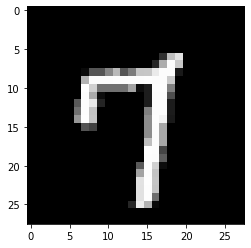

In [ ]:
for img_batch, label_batch in data_loader:
    print('first batch')
    print(img_batch.shape)
    #print(img_batch[0].squeeze(0).shape)
    plt.imshow(img_batch[0].permute(1,2,0), cmap='gray')
    print(label_batch)
    break

In [ ]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
device

device(type='cpu')

In [ ]:
image_size = 784
hidden_size = 256

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
D = nn.Sequential(
    nn.Linear(image_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size, 1),
    nn.Sigmoid()
)

In [ ]:
D.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

In [ ]:
latent_size = 64

In [ ]:
G = nn.Sequential(
    nn.Linear(latent_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, image_size),
    nn.Tanh()
)

In [ ]:
y = G(torch.randn(2, latent_size))
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())

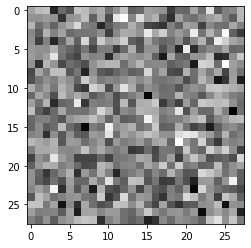

In [ ]:
plt.imshow(gen_imgs[1], cmap='gray')

In [ ]:
G.to(device)

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

In [ ]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)


Discriminator training

In [ ]:
def reset_grad():
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()
    
def train_discriminator(images):
    # create labels, for real image label is 1, for fac=ke 0
    
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)
    
    # loss for real images
    
    outputs = D(images)
    d_loss_real = criterion(outputs, real_labels)
    real_score = outputs
    
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)
    d_loss_fake = criterion(outputs, fake_labels)
    fake_score = outputs
    
    # Combine losses
    
    d_loss = d_loss_real + d_loss_fake
    reset_grad()
    # Compute gradients
    
    d_loss.backward()
    #Adjust parameters using backpropagation
    
    d_optimizer.step()
    
    return d_loss, real_score, fake_score


Training Generator

In [ ]:
def train_generator():
    # Generate fake images and calculate loss
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    g_loss = criterion(D(fake_images), labels)

    # Backprop and optimize
    reset_grad()
    g_loss.backward()
    g_optimizer.step()
    return g_loss, fake_images

In [ ]:
import os

sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

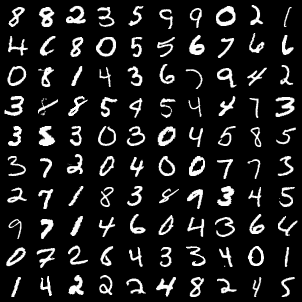

In [ ]:
from IPython.display import Image
from torchvision.utils import save_image

# Save some real images
for images, _ in data_loader:
    images = images.reshape(images.size(0), 1, 28, 28)
    save_image(denorm(images), os.path.join(sample_dir, 'real_images.png'), nrow=10)
    break
   
Image(os.path.join(sample_dir, 'real_images.png'))

Saving fake_images-0000.png


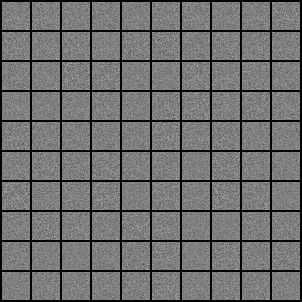

In [ ]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)

def save_fake_images(index):
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 1, 28, 28)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow=10)
    
# Before training
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

In [ ]:
%%time

num_epochs = 30
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)
        
        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()
        
        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
        
    # Sample and save images
    save_fake_images(epoch+1)


Epoch [0/30], Step [200/600], d_loss: 0.0493, g_loss: 4.0652, D(x): 0.99, D(G(z)): 0.04
Epoch [0/30], Step [400/600], d_loss: 0.0849, g_loss: 5.4340, D(x): 0.99, D(G(z)): 0.07
Epoch [0/30], Step [600/600], d_loss: 0.0219, g_loss: 5.4014, D(x): 0.99, D(G(z)): 0.01
Saving fake_images-0001.png
Epoch [1/30], Step [200/600], d_loss: 0.0422, g_loss: 5.6616, D(x): 0.99, D(G(z)): 0.03
Epoch [1/30], Step [400/600], d_loss: 0.0632, g_loss: 5.6771, D(x): 0.97, D(G(z)): 0.03
Epoch [1/30], Step [600/600], d_loss: 0.1938, g_loss: 4.5183, D(x): 0.91, D(G(z)): 0.05
Saving fake_images-0002.png
Epoch [2/30], Step [200/600], d_loss: 0.4030, g_loss: 3.1432, D(x): 0.84, D(G(z)): 0.12
Epoch [2/30], Step [400/600], d_loss: 0.2581, g_loss: 2.9441, D(x): 0.94, D(G(z)): 0.15
Epoch [2/30], Step [600/600], d_loss: 0.2507, g_loss: 3.3424, D(x): 0.90, D(G(z)): 0.11
Saving fake_images-0003.png
Epoch [3/30], Step [200/600], d_loss: 0.0936, g_loss: 3.6283, D(x): 0.97, D(G(z)): 0.05
Epoch [3/30], Step [400/600], d_loss

In [ ]:
# Save the model checkpoints 
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

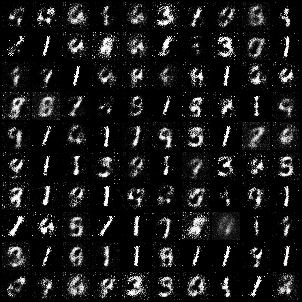

In [ ]:
Image('./samples/fake_images-0030.png')

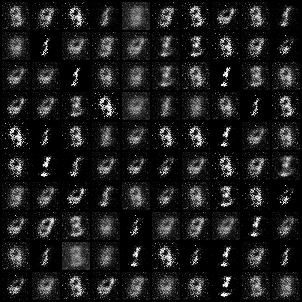

In [ ]:
Image('./samples/fake_images-0015.png')

In [ ]:
import cv2
import os
from IPython.display import FileLink

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

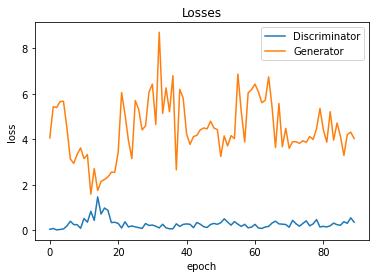

In [ ]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

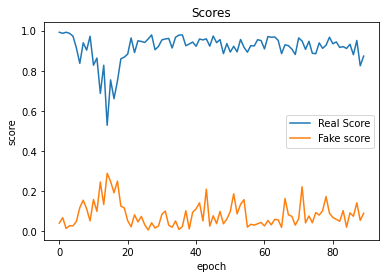

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');